### Neural Networks with Gluon

In this notebook, we will build, train and validate a Neural Network using Gluon/MXNet.

<ul>
<li>Implementing a neural network with Gluon</li>
<li>Loss Functions</li>
<li>Training</li>
<li>Example - Binary Classification</li>
<li>Natural Language Processing Context</li>
</ul>

In [2]:
from mxnet.gluon import nn

net = nn.Sequential()

net.add(nn.Dense(64,                    # Dense layer-1 with 64 units
                 in_units=3,            # Input size of 3 is expected
                 activation='tanh'),    # Tanh activation is applied
        nn.Dropout(.4),                 # Apply random 40% drop-out to layer_1
        
        nn.Dense(64,                    # Dense layer-2 with 64 units  
                 activation='tanh'      # Tanh activation is applied
                ),
        nn.Dropout(.3),                 # Apply random 30% drop-out to layer_2
        
        nn.Dense(1))                    # Output layer with single unit

print(net)


Sequential(
  (0): Dense(3 -> 64, Activation(tanh))
  (1): Dropout(p = 0.4, axes=())
  (2): Dense(None -> 64, Activation(tanh))
  (3): Dropout(p = 0.3, axes=())
  (4): Dense(None -> 1, linear)
)


In [3]:
from mxnet import init

net.initialize(init=init.Xavier())

In [4]:
print(net[0])
print(net[1])
print(net[2])
print(net[3])
print(net[4])

Dense(3 -> 64, Activation(tanh))
Dropout(p = 0.4, axes=())
Dense(None -> 64, Activation(tanh))
Dropout(p = 0.3, axes=())
Dense(None -> 1, linear)


We will go over some popular loss functions here. We can select loss functions according to our problem. Full list of supported loss functions are available here

Binary Cross-entropy Loss: A common loss function for binary classification. It is given by:$$
\mathrm{BinaryCrossEntropyLoss} = -\sum_{examples}{(y\log(p) + (1 - y)\log(1 - p))}
$$where p is the prediction (between 0 and 1, ie. 0.831) and y is the true class (either 1 or 0).

In gluon, we can use binary cross entropy with SigmoidBinaryCrossEntropyLoss. It also applies sigmoid function on the predictions. Therefore, p is always between 0 and 1.

In [5]:
from mxnet.gluon.loss import SigmoidBinaryCrossEntropyLoss
loss = SigmoidBinaryCrossEntropyLoss()

Categorical Cross-entropy Loss: It is used for multi-class classification. We apply the softmax function on prediction probabilities and then extend the equation of binary cross-entropy. After the softmax function, summation of the predictions are equal to 1. Equation is below. y becomes 1 for true class and 0 for other classes.$$
\mathrm{CategoricalCrossEntropyLoss} = -\sum_{examples}\sum_{classes}{y_j\log(p_j)}
$$In gluon, SoftmaxCrossEntropyLoss implements the categorical cross-entropy loss with softmax function

In [6]:
from mxnet.gluon.loss import SoftmaxCrossEntropyLoss
loss = SoftmaxCrossEntropyLoss()

L2 Loss: This is a loss function for regression problems. It measures the squared difference between target values (y) and predictions (p). Here, square makes sure the offsets with different signs don't cancel out each other.$$
\mathrm{L2 loss} = \frac{1}{2} \sum_{examples}(y - p)^2
$$In gluon, we can use it with L2Loss:

In [7]:
from mxnet.gluon.loss import L2Loss
loss = L2Loss()

L1 Loss: This is similar to L2 loss. It measures the abolsute difference between target values (y) and predictions (p).$$
\mathrm{L1 loss} = \frac{1}{2} \sum_{examples}|y - p|
$$In gluon, we can use it with L1Loss:

In [8]:
from mxnet.gluon.loss import L1Loss
loss = L1Loss()

mxnet.gluon.Trainer() module provides necessary training algorithms for neural networks. We can use the following for training a network using Stochastic Gradient Descent method and learning rate of 0.001.

In [9]:
from mxnet import gluon

trainer = gluon.Trainer(net.collect_params(),
                        'sgd', 
                        {'learning_rate': 0.001}
                       )

In [10]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=750, shuffle=True, random_state=42, noise=0.05, factor=0.3)

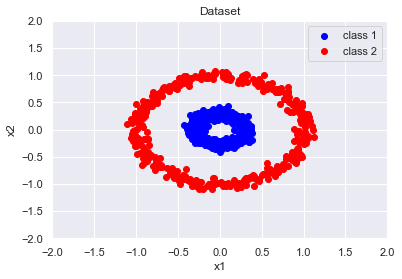

In [12]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

def plot_dataset(X, y, title):
    
    # Activate Seaborn visualization
    sns.set()
    
    # Plot both classes: Class1->Blue, Class2->Red
    plt.scatter(X[y==1, 0], X[y==1, 1], c='blue', label="class 1")
    plt.scatter(X[y==0, 0], X[y==0, 1], c='red', label="class 2")
    plt.legend(loc='upper right')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.xlim(-2, 2)
    plt.ylim(-2, 2)
    plt.title(title)
    plt.show()
    
plot_dataset(X, y, title="Dataset")

In [13]:
import time
import mxnet as mx
from mxnet import gluon, autograd
import mxnet.ndarray as nd
from mxnet.gluon.loss import SigmoidBinaryCrossEntropyLoss

We are creating the network below. We will have two hidden layers. Since the data seems easily seperable, we can have a small network (2 hidden layers) with 10 units at each layer.

In [14]:
from mxnet import init
from mxnet.gluon import nn

net = nn.Sequential()
net.add(nn.Dense(10, in_units=2, activation='relu'),
        nn.Dense(10, activation='relu'),
        nn.Dense(1, activation='sigmoid'))
net.initialize(init=init.Xavier())

In [15]:
batch_size = 4           # How many samples to use for each weight update 
epochs = 50              # Total number of iterations
learning_rate = 0.01     # Learning rate
context = mx.cpu()       # Using CPU resource

# Define the loss. As we used sigmoid in the last layer, use from_sigmoid=True
binary_cross_loss = SigmoidBinaryCrossEntropyLoss(from_sigmoid=True)

# Define the trainer, SGD with learning rate
trainer = gluon.Trainer(net.collect_params(),
                        'sgd',
                        {'learning_rate': learning_rate}
                       )

In [16]:
# Splitting the dataset into two parts: 80%-20% split
X_train, X_val = X[0:int(len(X)*0.8), :], X[int(len(X)*0.8):, :]
y_train, y_val = y[:int(len(X)*0.8)], y[int(len(X)*0.8):]

# Convert to ND arrays for gluon
X_train = nd.array(X_train)
X_val = nd.array(X_val)
y_train = nd.array(y_train)
y_val = nd.array(y_val)

# Using Gluon Data loaders to load the data in batches
train_dataset = gluon.data.ArrayDataset(X_train, y_train)
train_loader = gluon.data.DataLoader(train_dataset, batch_size=batch_size)

Let's start the training process. We will have training and validation sets and print our losses at each step.

In [17]:
import time

train_losses = []
val_losses = []
for epoch in range(epochs):
    start = time.time()
    training_loss = 0
    # Training loop, train the network
    for idx, (data, target) in enumerate(train_loader):

        data = data.as_in_context(context)
        target = target.as_in_context(context)
        
        with autograd.record():
            output = net(data)
            L = binary_cross_loss(output, target)
            training_loss += nd.sum(L).asscalar()
            L.backward()
        trainer.step(data.shape[0])
    
    # Get validation predictions
    val_predictions = net(X_val.as_in_context(context))
    # Calculate validation loss
    val_loss = nd.sum(binary_cross_loss(val_predictions, y_val)).asscalar()
    
    # Let's take the average losses
    training_loss = training_loss / len(y_train)
    val_loss = val_loss / len(y_val)
    
    train_losses.append(training_loss)
    val_losses.append(val_loss)
    
    end = time.time()
    print("Epoch %s. Train_loss %f Validation_loss %f Seconds %f" % \
          (epoch, training_loss, val_loss, end-start))


Epoch 0. Train_loss 0.717287 Validation_loss 0.707328 Seconds 0.644248
Epoch 1. Train_loss 0.698457 Validation_loss 0.694622 Seconds 0.531529
Epoch 2. Train_loss 0.683981 Validation_loss 0.681235 Seconds 0.517535
Epoch 3. Train_loss 0.670197 Validation_loss 0.667785 Seconds 0.527540
Epoch 4. Train_loss 0.653411 Validation_loss 0.648352 Seconds 0.494646
Epoch 5. Train_loss 0.632768 Validation_loss 0.627517 Seconds 0.506598
Epoch 6. Train_loss 0.611411 Validation_loss 0.606206 Seconds 0.497624
Epoch 7. Train_loss 0.588618 Validation_loss 0.582911 Seconds 0.521910
Epoch 8. Train_loss 0.564000 Validation_loss 0.557464 Seconds 0.485655
Epoch 9. Train_loss 0.536602 Validation_loss 0.528374 Seconds 0.526542
Epoch 10. Train_loss 0.505457 Validation_loss 0.494894 Seconds 0.486010
Epoch 11. Train_loss 0.470475 Validation_loss 0.457515 Seconds 0.488648
Epoch 12. Train_loss 0.432076 Validation_loss 0.416653 Seconds 0.481687
Epoch 13. Train_loss 0.391388 Validation_loss 0.374049 Seconds 0.481667
Ep

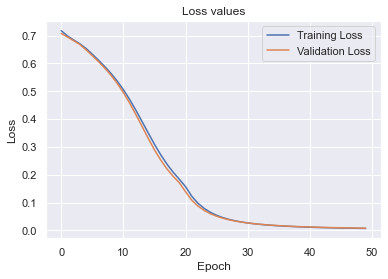

In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

plt.plot(train_losses, label="Training Loss")
plt.plot(val_losses, label="Validation Loss")
plt.title("Loss values")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.show()